<a href="https://colab.research.google.com/github/Thabo2023/BURN-IN-PARAMETERS/blob/main/T2T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter a custom label for SA-063_1.TXT (or press Enter to use the filename): Pre-Production SA-063
Enter a custom label for SA-099_2.TXT (or press Enter to use the filename): Pre-Production SA-099


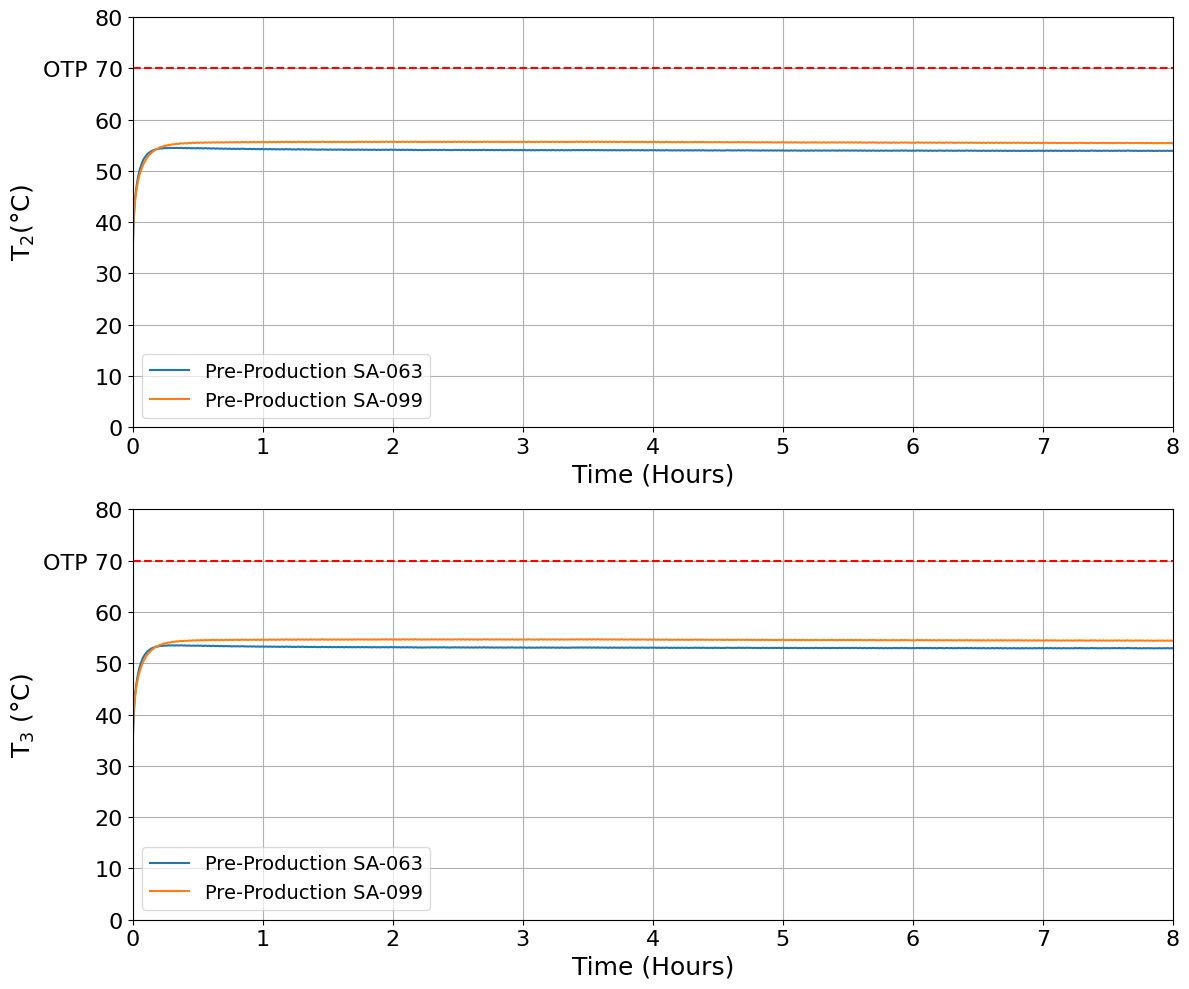

In [26]:
#This Plots T_2 and T_3

import sys
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# Suppress output for large datasets
sys.stdout = open(os.devnull, 'w')

# Re-enable output
sys.stdout = sys.__stdout__
print("Output re-enabled.")

# Define the file names
files = ["SA-063_1.TXT", "SA-099_2.TXT", "SA-083_4.TXT", "SA-098_5.TXT","SA-081_6.TXT", "SA-068_7.TXT"]

all_time_lists = []
all_t2_lists = []
all_t3_lists = []
file_labels = []

# Get custom labels
custom_labels = {}
for file in files:
    label = input(f"Enter a custom label for {file} (or press Enter to use the filename): ")
    custom_labels[file] = label if label else os.path.basename(file)

# Process files
for file in files:
    if not os.path.exists(file):
        print(f"Error: The file {file} does not exist.")
        continue

    print(f"Processing file: {file}")
    time_list = []
    t2_list = []
    t3_list = []

    with open(file, encoding="utf-8", errors='ignore') as fr:
        for _ in range(8):
            fr.readline()

        first = False
        t0 = 0

        for line in fr.readlines():
            line = line.strip()
            if len(line) == 0:
                continue

            if "restarted" in line:
                first = True
                continue

            if not first:
                continue

            chk = line.split("\t")

            try:
                time = datetime.datetime.strptime(chk[0], "%m/%d/%Y %I:%M:%S %p")
                t2 = float(chk[2])
                t3 = float(chk[3])

                rtime_convert = (time - datetime.datetime(1970, 1, 1)).total_seconds()

                if t0 == 0:
                    t0 = rtime_convert
                tt = (rtime_convert - t0) / 3600

                time_list.append(tt)
                t2_list.append(t2)
                t3_list.append(t3)

            except ValueError as ve:
                print(f"Skipping line due to error: {ve}")
                continue

    if time_list and t2_list and t3_list:
        all_time_lists.append(time_list)
        all_t2_lists.append(t2_list)
        all_t3_lists.append(t3_list)
        file_labels.append(custom_labels[file])
    else:
        print(f"No valid data found in file: {file}")

# Synchronize time
common_time = np.linspace(0, max([max(lst) for lst in all_time_lists]), num=500)

interpolated_t2 = []
interpolated_t3 = []

for time_list, t2_list, t3_list in zip(all_time_lists, all_t2_lists, all_t3_lists):
    f_t2 = interp1d(time_list, t2_list, bounds_error=False, fill_value="extrapolate")
    f_t3 = interp1d(time_list, t3_list, bounds_error=False, fill_value="extrapolate")

    interpolated_t2.append(f_t2(common_time))
    interpolated_t3.append(f_t3(common_time))

mean_t2 = np.mean(interpolated_t2, axis=0)
mean_t3 = np.mean(interpolated_t3, axis=0)

# Plotting with updated font sizes
plt.figure(figsize=(12, 10))

# First subplot (T2)
plt.subplot(2, 1, 1)
for time_list, t2_list, label in zip(all_time_lists, all_t2_lists, file_labels):
    plt.plot(time_list, t2_list, label=f'{label}')

plt.xlabel('Time (Hours)', fontsize=18)
plt.ylabel('T$_2$(°C)', fontsize=18)
plt.ylim(0, 75)
plt.xlim(0, 8)
plt.grid(True)

# Increased font size for axis numbers
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Improved legend placement
plt.legend(fontsize=14, loc='lower left', framealpha=0.7)

# OTP line and label formatting
plt.axhline(y=70, color='red', linestyle='--')
y_ticks = plt.yticks()[0]
y_labels = [f'OTP 70' if y == 70 else f'{y:.0f}' for y in y_ticks]
plt.yticks(y_ticks, y_labels)

# Second subplot (T3)
plt.subplot(2, 1, 2)
for time_list, t3_list, label in zip(all_time_lists, all_t3_lists, file_labels):
    plt.plot(time_list, t3_list, label=f'{label}')

plt.xlabel('Time (Hours)', fontsize=18)
plt.ylabel('T$_3$ (°C)', fontsize=18)
plt.ylim(0, 75)
plt.xlim(0, 8)
plt.grid(True)

# Increased font size for axis numbers
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Improved legend placement
plt.legend(fontsize=14, loc='lower left', framealpha=0.7)

# OTP line and label foXrmatting
plt.axhline(y=70, color='red', linestyle='--')
y_ticks = plt.yticks()[0]
y_labels = [f'OTP 70' if y == 70 else f'{y:.0f}' for y in y_ticks]
plt.yticks(y_ticks, y_labels)

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')